In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import sys
# Needed for the model class to work inside a Notebook.
os.environ["COBAYA_NOMPI"] = "True"

from cobaya.yaml          import yaml_load_file
from cobaya.samplers.mcmc import plot_progress
from cobaya.model         import get_model
from cobaya.samplers.mcmc import plot_progress
#
from getdist.mcsamples    import MCSamplesFromCobaya
from getdist.mcsamples    import loadMCSamples
import getdist.plots      as     gdplt
#
import os

In [3]:
info = yaml_load_file("yaml_polynomials/recsym_cubic_pkells_n3.yaml")
print(info['params'].keys())
print(info['output'])

dict_keys(['apar', 'aperp', 'B1_bao', 'F_bao', 'SigmaFoG_bao', 'A', 'f_fac'])
chains_polynomials/recsym_cubic_pkells_n3


array([<AxesSubplot:ylabel='$R-1$'>, <AxesSubplot:ylabel='acc. rate'>],
      dtype=object)

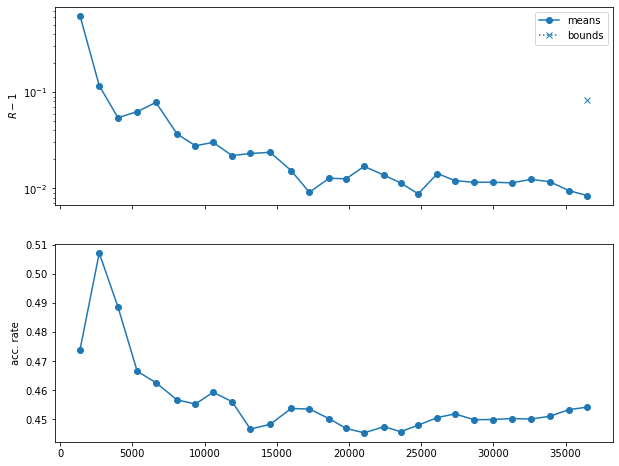

In [4]:
plot_progress(info['output'],figure_kwargs={"figsize": (10,8)})

In [22]:
root = '/global/cscratch1/sd/sfschen/CobayaBAO_DESI/chains_polynomials/recsym_cubic_pkells_n'


samples_3 = loadMCSamples(root + '3', no_cache=True, \
                        settings={'ignore_rows':0.5
                        })

samples_4 = loadMCSamples(root + '4', no_cache=True, \
                        settings={'ignore_rows':0.5
                        })

samples_5 = loadMCSamples(root + '5', no_cache=True, \
                        settings={'ignore_rows':0.5
                        })

samples_6 = loadMCSamples(root + '6', no_cache=True, \
                        settings={'ignore_rows':0.5
                        })

samples_7 = loadMCSamples(root + '7', no_cache=True, \
                        settings={'ignore_rows':0.5
                        })

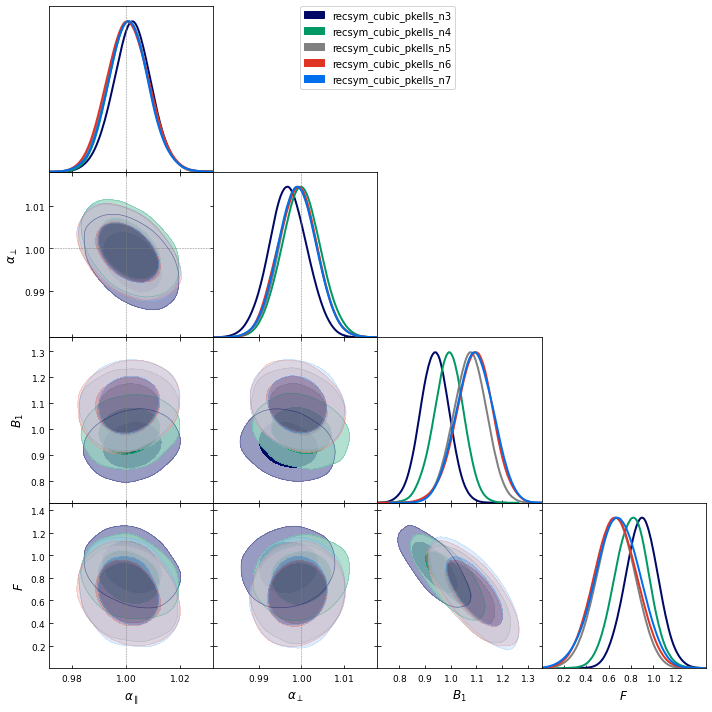

In [23]:
gdplot = gdplt.get_subplot_plotter(subplot_size=2.5)

params = ['apar', 'aperp', 'B1_bao', 'F_bao']

gdplot.triangle_plot([ samples_3, samples_4, samples_5, samples_6, samples_7],\
                     params,\
                     filled=True,\
                     contour_lws=2, title_limit=0,\
                     alphas = [1.0, 0.75, 0.5, 0.4, 0.3, 0.2],\
                     markers={'apar': 1.0, 'aperp':1.0},\
                     figure_kwargs={"figsize": (15,15)})

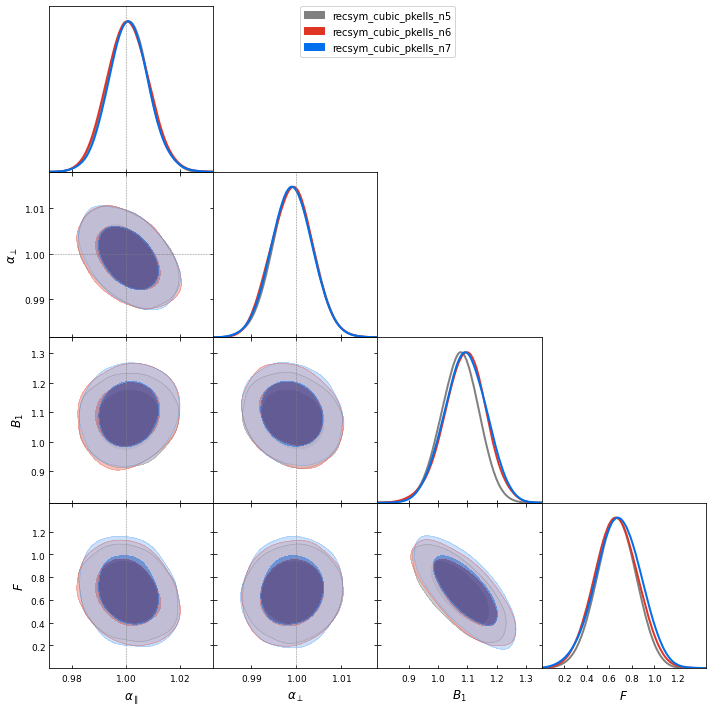

In [30]:
gdplot = gdplt.get_subplot_plotter(subplot_size=2.5)

params = ['apar', 'aperp', 'B1_bao', 'F_bao']

gdplot.triangle_plot([samples_5, samples_6, samples_7],\
                     params,\
                     filled=True,\
                     contour_lws=2, title_limit=0,\
                     alphas = [1.0, 0.75, 0.5],\
                     markers={'apar': 1.0, 'aperp':1.0},\
                     figure_kwargs={"figsize": (15,15)})

In [25]:
chains = [samples_3, samples_4, samples_5, samples_6, samples_7]

for chain in chains:
    
    print(chain.getName())
    print(chain.getInlineLatex('apar'))
    print(chain.getInlineLatex('aperp'))
    print(chain.getCorrelationMatrix()[0,1])
    
    print('')


recsym_cubic_pkells_n3
\alpha_\parallel = 1.0023\pm 0.0072
\alpha_\perp = 0.9968\pm 0.0045
-0.40744538413495246

recsym_cubic_pkells_n4
\alpha_\parallel = 1.0013\pm 0.0074
\alpha_\perp = 0.9999\pm 0.0046
-0.40544045156354963

recsym_cubic_pkells_n5
\alpha_\parallel = 1.0008\pm 0.0076
\alpha_\perp = 0.9992\pm 0.0045
-0.4094192049831423

recsym_cubic_pkells_n6
\alpha_\parallel = 1.0008\pm 0.0078
\alpha_\perp = 0.9991\pm 0.0046
-0.4125791904011251

recsym_cubic_pkells_n7
\alpha_\parallel = 1.0010\pm 0.0075
\alpha_\perp = 0.9990\pm 0.0046
-0.42573467392391634



In [14]:
tabs = samples_3.getParams()

bf = np.argmin(tabs.chi2)
bf_chi2 = tabs.chi2[bf]

bf_params = {}

for param in info['params'].keys():
    # Only add to list if sampled
    if 'ref' in info['params'][param].keys():
        bf_params[param] = getattr(tabs, param)[bf]
        
print(bf_params)
#print('logpost: ', (tabs.chi2 + 2*tabs.minuslogprior)[bf]/2)
#print("Reduced chi2:  ", bf_chi2 / ( 120  - len(bf_params)))

{'apar': 1.0005181, 'aperp': 0.99993043, 'B1_bao': 1.1569312, 'F_bao': 0.73140294}


In [11]:
bf_chi2

107.58446

In [12]:
samples.getCorrelationMatrix()[:4,:4]

array([[ 1.        , -0.42384166,  0.12498694, -0.23438294],
       [-0.42384166,  1.        , -0.19851541,  0.09449498],
       [ 0.12498694, -0.19851541,  1.        , -0.71961297],
       [-0.23438294,  0.09449498, -0.71961297,  1.        ]])

In [13]:
import sys
sys.path.append('./lss_likelihood/')

In [14]:
model= get_model(info)
lik = model.likelihood['bao_zeldovich_likelihood_flex_am.ZeldovichBAOLikelihood']

[model] *WARNING* Ignored blocks/options: ['sampler', 'output', 'stop_on_error']


In [15]:
model.logposterior(bf_params)

LogPosterior(logpost=-57.84349916816307, logpriors=[-4.051272514754915], loglikes=array([-53.79222665]), derived=[])

In [16]:
bf_params['apar'] = 1.0
bf_params['aperp'] = 1.0

model.logposterior(bf_params)
bf_obs = lik.get_best_fit()

lik.bf_thetas

array([ 0.00427065, -0.00750979,  0.00029243,  0.00450017, -0.00182573,
       -0.00133897,  0.00221283,  0.00097848, -0.00268816,  0.0011941 ])

In [17]:
#tt = lik.bao_predict('bao', thetas=lik.linear_param_means)
#obs = lik.bao_observe(tt)

In [18]:
#M = lik.binmat

In [19]:
bf_params

{'apar': 1.0,
 'aperp': 1.0,
 'B1_bao': 1.1496388000000002,
 'F_bao': 0.79980485,
 'SigmaFoG_bao': 3.0278852,
 'A': 1.0566061000000002,
 'f_fac': 0.87090189}

In [20]:
#np.savetxt('r_theory.txt', tt[:,0])
#np.savetxt('binmat.txt', M)

In [21]:
rdats = lik.xdat
xi0dat = lik.y0dat
xi2dat = lik.y2dat

[model] *WARNING* Ignored blocks/options: ['sampler', 'output', 'stop_on_error']


[model] *WARNING* Ignored blocks/options: ['sampler', 'output', 'stop_on_error']


[model] *WARNING* Ignored blocks/options: ['sampler', 'output', 'stop_on_error']


[model] *WARNING* Ignored blocks/options: ['sampler', 'output', 'stop_on_error']


(-10.0, 80.0)

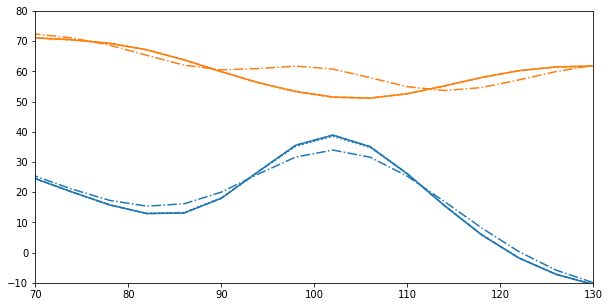

In [28]:
plt.figure(figsize=(10,5))


params = {'apar': 1.0,
 'aperp': 1.0,
 'B1_bao': 1.1453427999999999, 'F_bao': 0.77740741,\
 'SigmaFoG_bao': 0,
 'A': 1.0,
 'f_fac': 1.0}

params = dict(params)
params['A'] = 0.8

model= get_model(info)
lik = model.likelihood['bao_zeldovich_likelihood_flex_am.ZeldovichBAOLikelihood']
model.logposterior(params)
obs = np.array(lik.get_best_fit())

plt.plot(rdats, rdats**2 * obs[:50])
plt.plot(rdats, -rdats**2 * obs[50:])

# Vary A

params = {'apar': 1.0,
 'aperp': 1.0,
 'B1_bao': 1.1453427999999999, 'F_bao': 0.77740741,\
 'SigmaFoG_bao': 0,
 'A': 0.8,
 'f_fac': 1.0}

model= get_model(info)
lik = model.likelihood['bao_zeldovich_likelihood_flex_am.ZeldovichBAOLikelihood']
model.logposterior(params)
obs_A = np.array(lik.get_best_fit())

plt.plot(rdats, rdats**2 * obs_A[:50], 'C0--')
plt.plot(rdats, -rdats**2 * obs_A[50:], 'C1--')

# Vary f

params = {'apar': 1.0,
 'aperp': 1.0,
 'B1_bao': 1.1453427999999999, 'F_bao': 0.77740741,\
 'SigmaFoG_bao': 0,
 'A': 1.0,
 'f_fac': 0.8}

model= get_model(info)
lik = model.likelihood['bao_zeldovich_likelihood_flex_am.ZeldovichBAOLikelihood']
model.logposterior(params)
bf_obs = np.array(np.array(lik.get_best_fit()))

plt.plot(rdats, rdats**2 * bf_obs[:50], 'C0:')
plt.plot(rdats, -rdats**2 * bf_obs[50:], 'C1:')


# Vary SigmaFoG

params = {'apar': 1.0,
 'aperp': 1.0,
 'B1_bao': 1.1453427999999999, 'F_bao': 0.77740741,\
 'SigmaFoG_bao': 100.0,
 'A': 1.0,
 'f_fac': 1.0}

model= get_model(info)
lik = model.likelihood['bao_zeldovich_likelihood_flex_am.ZeldovichBAOLikelihood']
model.logposterior(params)
obs_FoG = np.array(lik.get_best_fit())

plt.plot(rdats, rdats**2 * obs_FoG[:50], 'C0-.')
plt.plot(rdats, -rdats**2 * obs_FoG[50:], 'C1-.')


plt.xlim(70,130)
plt.ylim(-10,80)

In [23]:
params

{'apar': 1.0,
 'aperp': 1.0,
 'B1_bao': 1.1453427999999999,
 'F_bao': 0.77740741,
 'SigmaFoG_bao': 25.0,
 'A': 1.0,
 'f_fac': 1.0}

In [24]:
lik.Zel

{'R': 15.0,
 'fz': 0.8315978342939394,
 'klin': array([1.00000000e-03, 1.00461810e-03, 1.00925754e-03, ...,
        9.90827380e+00, 9.95403124e+00, 1.00000000e+01]),
 'pnw': array([1.69434769e+03, 1.70160031e+03, 1.70888196e+03, ...,
        1.01147402e-01, 9.90352829e-02, 9.87661435e-02]),
 'pw': array([ 6.27505901e-01,  6.68220320e-01,  7.09445939e-01, ...,
         1.72592009e-05,  9.18936256e-04, -7.92723764e-06]),
 'sigmas': (10.556307852555234,
  9.45499094916356,
  10.565115328400125,
  13.777685164072894,
  0.03123000341125935)}